## IMPORTING Covid19-radiography-database DATASET

In [ ]:
!pip install opendatasets --upgrade

In [ ]:
# !cp -r "/content/covid19-radiography-database" "/content/drive/MyDrive/Covid"

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
checkpoint =ModelCheckpoint(filepath="Custom_CNN__ternary_model.h5", 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True, 
                            save_weights_only=False, 
                            mode='auto',
                            save_freq='epoch')

callbacks = [checkpoint]

## *CREATING CNN_TERNARY MODEL*

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
 
model1.add(Conv2D(64, (3, 3),activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
 
model1.add(Conv2D(128, (3, 3),activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
 
model1.add(Conv2D(256, (3, 3),activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
 
model1.add(Conv2D(512, (3, 3),activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
 
model1.add(Flatten())
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(3, activation='softmax'))
 
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [ ]:

base_dir =r'/content/Final'
 
datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2)
 
 
train_generator = datagen.flow_from_directory(
              base_dir,  # This is the source directory for training images
              target_size=(224, 224),  
              batch_size=32,
              subset='training',
              class_mode='categorical')
 
 
validation_generator = datagen.flow_from_directory(
              base_dir,
              target_size=(224,224),
              batch_size=32,
              subset='validation',
              shuffle=False,
              class_mode='categorical')

Found 3109 images belonging to 3 classes.
Found 777 images belonging to 3 classes.


In [ ]:
hist = model1.fit_generator(train_generator,
                         steps_per_epoch = (train_generator.samples//32),
                         epochs = 5,
                         validation_data = validation_generator,
                         validation_steps = (validation_generator.samples/32),
                         callbacks=[checkpoint],
                         verbose = 1 )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
97/97 [==============================] - 45s 462ms/step - loss: 0.7474 - accuracy: 0.6383 - val_loss: 0.3733 - val_accuracy: 0.8906

Epoch 00001: val_accuracy improved from -inf to 0.89060, saving model to Custom_CNN__ternary_model.h5
Epoch 2/5
97/97 [==============================] - 45s 460ms/step - loss: 0.3114 - accuracy: 0.8889 - val_loss: 0.2126 - val_accuracy: 0.9344

Epoch 00002: val_accuracy improved from 0.89060 to 0.93436, saving model to Custom_CNN__ternary_model.h5
Epoch 3/5
97/97 [==============================] - 44s 456ms/step - loss: 0.1858 - accuracy: 0.9324 - val_loss: 0.3408 - val_accuracy: 0.8983

Epoch 00003: val_accuracy did not improve from 0.93436
Epoch 4/5
97/97 [==============================] - 45s 460ms/step - loss: 0.1545 - accuracy: 0.9470 - val_loss: 0.2062 - val_accuracy: 0.9408

Epoch 00004: val_accuracy improved from 0.93436 to 0.94080, saving model to Custom_CNN__ternary_model.h5
Epoch 5/5
97/97 [==============================] - 44s 458ms/

## Accuracy of Ternary Classification using Custom CNN

In [ ]:
ans = model1.evaluate(validation_generator,verbose=1)
print('Accuracy: %.2f' % (ans[1]*100))

25/25 [==============================] - 10s 394ms/step - loss: 0.2110 - accuracy: 0.9408
Accuracy: 94.08


In [ ]:
!cp -r "/content/Custom_CNN__ternary_model.h5" "/content/drive/MyDrive/Model"

# **Prediction using X_RAY Scan Image**

YOU ARE A COVID-19 PATIENT


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


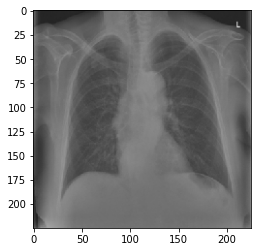

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import numpy as np

def load_image(filename):
  # load the image
  img = load_img(filename, target_size=(225, 225))
  # convert to array
  img = img_to_array(img)
  plt.imshow(img/255.)
  # reshape into a single sample with 3 channels
  img = img.reshape(1, 225, 225, 3)
  return img

def predict(img):
  result = model1.predict_classes(img)
  if(result[0]==0):
    print("YOU ARE A COVID-19 PATIENT")
  elif(result[0]==1):
    print("YOU ARE  NORMAL")
  else:
    print("YOU ARE A VIRAL PNEUMONIA PATIENT")

img1 = load_image('/content/drive/MyDrive/Covid/COVID-19 Radiography Database/COVID/COVID (1006).png')
predict(img1)

YOU ARE  NORMAL


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


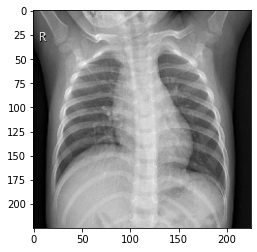

In [ ]:
img2 = load_image('/content/drive/MyDrive/Covid/COVID-19 Radiography Database/NORMAL/NORMAL (104).png')
predict(img2)

YOU ARE A VIRAL PNEUMONIA PATIENT


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


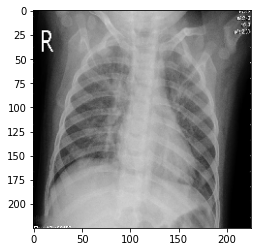

In [ ]:
img3 = load_image('/content/drive/MyDrive/Covid/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1).png')
predict(img3)

### ACCURACY GRAPH

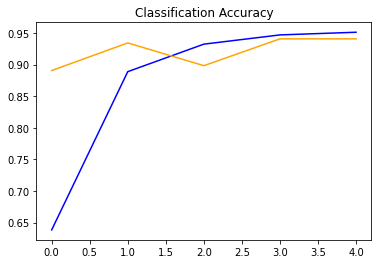

In [ ]:
from matplotlib import pyplot

# pyplot.subplot(211)
# pyplot.title('Cross Entropy Loss')
# pyplot.plot(hist.history['loss'], color='blue', label='train')
# pyplot.plot(hist.history['val_loss'], color='orange', label='test')
# # plot accuracy
#pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(hist.history['accuracy'], color='blue', label='train')
pyplot.plot(hist.history['val_accuracy'], color='orange', label='test')
pyplot.savefig("accuracy1.png",dpi=300)

In [ ]:
!cp -r "/content/drive/MyDrive/Model"

## Visualizing Feature Map

In [ ]:
#from keras.Input import Model
import keras
feature = keras.Model(model1.input,model1.layers[1].output)
feature.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import cv2
img= cv2.imread("/content/drive/MyDrive/Covid/COVID-19 Radiography Database/COVID/COVID (1).png")
img2= cv2.resize(img,(224,224))
img2= np.expand_dims(img2,axis=0)
print(img2.shape)
feature_maps = feature.predict(img2)
feature_maps.shape

(1, 224, 224, 3)


(1, 111, 111, 32)

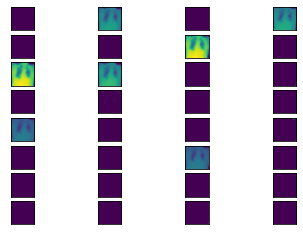

In [ ]:
#square = 16
ix = 1
for _ in range(8):
	for _ in range(4):
		# specify subplot and turn of axis
		ax = pyplot.subplot(8, 4, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.savefig('feature.png',dpi=1000)
pyplot.show()

## CREATING VGG MODEL

In [ ]:
from keras.layers import Dropout
from keras.applications import VGG16
VGG = VGG16(input_shape=(224,224,3),include_top=False,weights = 'imagenet')
VGG.trainable = False

modelV1 = Sequential()
modelV1.add(VGG)
modelV1.add(Flatten())
modelV1.add(Dense(128, activation = 'relu'))
modelV1.add(Dense(64, activation = 'relu'))
modelV1.add(Dropout(0.3))
modelV1.add(Dense(32, activation = 'relu'))
modelV1.add(Dense(3, activation='softmax'))

modelV1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
modelV1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [ ]:
checkpoint =ModelCheckpoint(filepath="VGG_CNN__ternary_model.h5", 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True, 
                            save_weights_only=False, 
                            mode='auto',
                            save_freq='epoch')

callbacks = [checkpoint]

In [ ]:
history = modelV1.fit_generator(train_generator,
                         steps_per_epoch = (train_generator.samples//32),
                         epochs = 5,
                         validation_data = validation_generator,
                         validation_steps = (validation_generator.samples/32),
                         callbacks=[checkpoint],
                         verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
97/97 [==============================] - 48s 478ms/step - loss: 0.7486 - accuracy: 0.7288 - val_loss: 0.1511 - val_accuracy: 0.9421

Epoch 00001: val_accuracy improved from -inf to 0.94208, saving model to VGG_CNN__ternary_model.h5
Epoch 2/5
97/97 [==============================] - 46s 475ms/step - loss: 0.1573 - accuracy: 0.9452 - val_loss: 0.1474 - val_accuracy: 0.9447

Epoch 00002: val_accuracy improved from 0.94208 to 0.94466, saving model to VGG_CNN__ternary_model.h5
Epoch 3/5
97/97 [==============================] - 46s 474ms/step - loss: 0.0955 - accuracy: 0.9691 - val_loss: 0.0859 - val_accuracy: 0.9717

Epoch 00003: val_accuracy improved from 0.94466 to 0.97169, saving model to VGG_CNN__ternary_model.h5
Epoch 4/5
97/97 [==============================] - 46s 476ms/step - loss: 0.0608 - accuracy: 0.9793 - val_loss: 0.0836 - val_accuracy: 0.9704

Epoch 00004: val_accuracy did not improve from 0.97169
Epoch 5/5
97/97 [==============================] - 46s 471ms/step - lo


## Accuracy of VGG_TERNARY Model

In [ ]:
accuracy = modelV1.evaluate(validation_generator,verbose=1)
print('Accuracy: %.2f' % (accuracy[1]*100))

25/25 [==============================] - 10s 406ms/step - loss: 0.0976 - accuracy: 0.9704
Accuracy: 97.04


In [ ]:
!cp -r "/content/VGG_CNN__ternary_model.h5" "/content/drive/MyDrive/Model"

### VGG_ACCURACY GRAPH

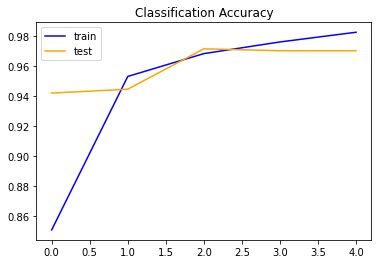

In [ ]:

pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend()
pyplot.savefig('accuracy2.png',dpi=300)

## COMPARISON OF VGG AND CUSTOM MODEL ACCURACY

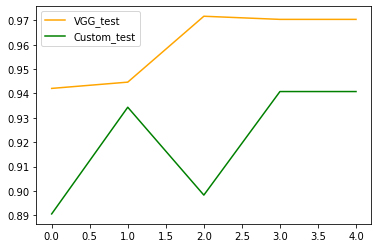

In [ ]:
pyplot.plot(history.history['val_accuracy'], color='orange', label='VGG_test')
pyplot.plot(hist.history['val_accuracy'], color='green', label='Custom_test')
pyplot.legend()
pyplot.savefig('accuracy_together.png',dpi=300)

In [ ]:
!cp -r "/content/accuracy_together.png" "/content/drive/MyDrive/Model"

## Creating Binary Model

In [ ]:
checkpoint =ModelCheckpoint(filepath="Custom_CNN__binary_model.h5", 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True, 
                            save_weights_only=False, 
                            mode='auto',
                            save_freq='epoch')

callbacks = [checkpoint]

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
 
model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
 
model2.add(Conv2D(128, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
 
model2.add(Conv2D(256, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
 
model2.add(Conv2D(512, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
 
model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1, activation='sigmoid'))
 
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [ ]:

base =r'/content/Binary1'

data= ImageDataGenerator(rescale=1./255,validation_split=0.2)


train = data.flow_from_directory(
              base,  # This is the source directory for training images
              target_size=(224, 224),  
              batch_size=32,
              subset='training',
              class_mode='binary')


val = data.flow_from_directory(
              base,
              target_size=(224,224),
              batch_size=32,
              subset='validation',
              shuffle=False,
              class_mode='binary')

Found 2033 images belonging to 2 classes.
Found 508 images belonging to 2 classes.


In [ ]:
h = model2.fit_generator(train,
                         steps_per_epoch = (train.samples//32),
                         epochs = 5,
                         validation_data = val,
                         validation_steps = (val.samples/32),
                         callbacks=[checkpoint],
                         verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
63/63 [==============================] - 22s 334ms/step - loss: 0.5981 - accuracy: 0.6545 - val_loss: 0.2518 - val_accuracy: 0.9547

Epoch 00001: val_accuracy improved from -inf to 0.95472, saving model to Custom_CNN__binary_model.h5
Epoch 2/5
63/63 [==============================] - 20s 326ms/step - loss: 0.1167 - accuracy: 0.9723 - val_loss: 0.1171 - val_accuracy: 0.9665

Epoch 00002: val_accuracy improved from 0.95472 to 0.96654, saving model to Custom_CNN__binary_model.h5
Epoch 3/5
63/63 [==============================] - 21s 326ms/step - loss: 0.0377 - accuracy: 0.9891 - val_loss: 0.0625 - val_accuracy: 0.9803

Epoch 00003: val_accuracy improved from 0.96654 to 0.98031, saving model to Custom_CNN__binary_model.h5
Epoch 4/5
63/63 [==============================] - 21s 328ms/step - loss: 0.0517 - accuracy: 0.9821 - val_loss: 0.0578 - val_accuracy: 0.9862

Epoch 00004: val_accuracy improved from 0.98031 to 0.98622, saving model to Custom_CNN__binary_model.h5
Epoch 5/5
63/63

## Accuarcy of binary classification of Covid and Normal

In [ ]:
acc = model2.evaluate(val,verbose=1)
print('Accuracy: %.2f' % (acc[1]*100))

16/16 [==============================] - 5s 321ms/step - loss: 0.0598 - accuracy: 0.9862
Accuracy: 98.62


In [ ]:
!cp -r "/content/Custom_CNN__binary_model.h5" "/content/drive/MyDrive/Model"

## ROC Curve of Binary classification of Covid and Normal

In [ ]:
import numpy as np
y_pred= model2.predict(val,verbose=1)
pred= np.round(y_pred)
y= val.classes
# y=np.expand_dims(y,axis=1)
print(pred.shape)

16/16 [==============================] - 5s 322ms/step
(508, 1)


In [ ]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(y,pred))

0.9862204724409449


In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
print(fpr)

[0.         0.01666667 1.        ]


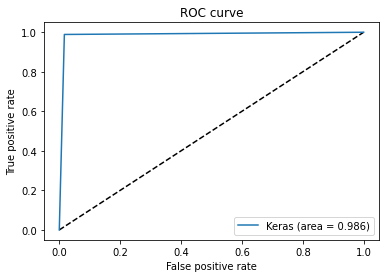

In [ ]:


# method I: plt
import matplotlib.pyplot as plt
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(roc_auc))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('Custom_binary.png',dpi=300)
plt.show()


In [ ]:
!cp -r "/content/Custom_binary.png" "/content/drive/MyDrive/Model"

## VGG Model for Binary Classification

In [ ]:
checkpoint =ModelCheckpoint(filepath="VGG_CNN__binary_model.h5", 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True, 
                            save_weights_only=False, 
                            mode='auto',
                            save_freq='epoch')

callbacks = [checkpoint]

In [ ]:
from keras.layers import Dropout
from keras.applications import VGG16
VGG = VGG16(input_shape=(224,224,3),include_top=False,weights = 'imagenet')
VGG.trainable = False

modelV2 = Sequential()
modelV2.add(VGG)
modelV2.add(Flatten())
modelV2.add(Dense(128, activation = 'relu'))
modelV2.add(Dense(64, activation = 'relu'))
modelV2.add(Dropout(0.3))
modelV2.add(Dense(32, activation = 'relu'))
modelV2.add(Dense(1, activation='sigmoid'))

modelV2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
modelV2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [ ]:
bi = modelV2.fit_generator(train,
                         steps_per_epoch = (train.samples//32),
                         epochs = 5,
                         validation_data = val,
                         validation_steps = (val.samples/32),
                         callbacks=[checkpoint],
                         verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
63/63 [==============================] - 24s 377ms/step - loss: 0.2513 - accuracy: 0.8512 - val_loss: 0.0156 - val_accuracy: 0.9961

Epoch 00001: val_accuracy improved from -inf to 0.99606, saving model to VGG_CNN__binary_model.h5
Epoch 2/5
63/63 [==============================] - 22s 344ms/step - loss: 0.0148 - accuracy: 0.9965 - val_loss: 0.0093 - val_accuracy: 0.9941

Epoch 00002: val_accuracy did not improve from 0.99606
Epoch 3/5
63/63 [==============================] - 22s 344ms/step - loss: 0.0135 - accuracy: 0.9952 - val_loss: 0.0028 - val_accuracy: 0.9980

Epoch 00003: val_accuracy improved from 0.99606 to 0.99803, saving model to VGG_CNN__binary_model.h5
Epoch 4/5
63/63 [==============================] - 22s 346ms/step - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.0031 - val_accuracy: 0.9980

Epoch 00004: val_accuracy did not improve from 0.99803
Epoch 5/5
63/63 [==============================] - 22s 345ms/step - loss: 7.8864e-04 - accuracy: 1.0000 - val_loss: 7.3

## Accuracy of VGG model in binary classification of Covid and Normal 

In [ ]:
bi = modelV2.evaluate(val,verbose=1)
print('Accuracy: %.2f' % (bi[1]*100))

16/16 [==============================] - 5s 343ms/step - loss: 7.3994e-04 - accuracy: 1.0000
Accuracy: 100.00


In [ ]:
!cp -r "/content/VGG_CNN__binary_model.h5" "/content/drive/MyDrive/Model"

## ROC Curve of VGG model in binary classification of Covid and Normal 

In [ ]:
y_Vpred= modelV2.predict_proba(val,verbose=1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


16/16 [==============================] - 6s 355ms/step


In [ ]:
Vpred= np.round(y_Vpred)
y_V= val.classes
# y=np.expand_dims(y,axis=1)
print(Vpred.shape)

(508, 1)


In [ ]:
# def prediction(pred):
#   y_pred=[]

#   for i in pred:
#     if i>0.5:
#       y_pred.append(1)
#     else:
#       y_pred.append(0)
#   return y_pred
    

# f_pred= prediction(y_Vpred)

In [ ]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(y_V,Vpred))

1.0


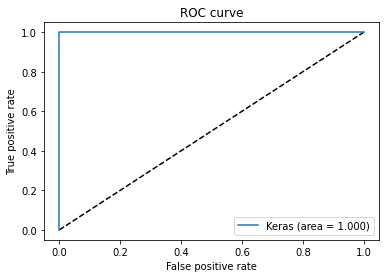

In [ ]:

fprV, tprV, thresholdV = metrics.roc_curve(y_V, Vpred)
roc_auc2 = metrics.auc(fprV, tprV)

# method I: plt

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprV, tprV, label='Keras (area = {:.3f})'.format(roc_auc2))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('VGG_binary',dpi=300)
plt.show()

In [ ]:
!cp -r "/content/VGG_binary.png" "/content/drive/MyDrive/Model"

## Comaprison of VGG and Custom binary model in classification of Covid and Normal

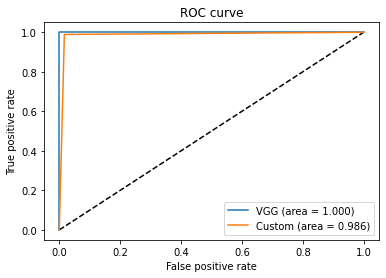

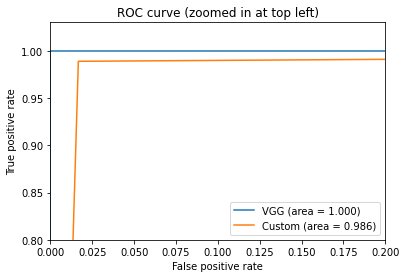

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprV, tprV, label='VGG (area = {:.3f})'.format(roc_auc2))
plt.plot(fpr, tpr, label='Custom (area = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('VGG_Custom_both',dpi=300)
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1.03)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprV, tprV, label='VGG (area = {:.3f})'.format(roc_auc2))
plt.plot(fpr, tpr, label='Custom (area = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.savefig('VGG_Custom_zoomed',dpi=300)
plt.show()

In [ ]:
!cp -r "/content/VGG_Custom_zoomed.png" "/content/drive/MyDrive/Model"

## Applying Custom Binary Model to Covid and Pneumonia

In [ ]:
b =r'/content/Binary2'

dat= ImageDataGenerator(rescale=1./255,validation_split=0.2)


tr = dat.flow_from_directory(
              b,  # This is the source directory for training images
              target_size=(224, 224),  
              batch_size=32,
              subset='training',
              class_mode='binary')


va = dat.flow_from_directory(
              b,
              target_size=(224,224),
              batch_size=32,
              subset='validation',
              shuffle = False,
              class_mode='binary')

Found 2036 images belonging to 2 classes.
Found 509 images belonging to 2 classes.


In [ ]:
checkpoint =ModelCheckpoint(filepath="Custom_CNN__binary_model_Pneumonia.h5", 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True, 
                            save_weights_only=False, 
                            mode='auto',
                            save_freq='epoch')

callbacks = [checkpoint]

In [ ]:
histo = model2.fit_generator(tr,
                         steps_per_epoch = (tr.samples//32),
                         epochs = 5,
                         validation_data = va,
                         validation_steps = (va.samples/32),
                         callbacks = [checkpoint],
                         verbose=1 )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
63/63 [==============================] - 28s 451ms/step - loss: 0.1435 - accuracy: 0.9511 - val_loss: 0.1031 - val_accuracy: 0.9784

Epoch 00001: val_accuracy improved from -inf to 0.97839, saving model to Custom_CNN__binary_model_Pneumonia.h5
Epoch 2/5
63/63 [==============================] - 28s 440ms/step - loss: 0.0790 - accuracy: 0.9746 - val_loss: 0.1670 - val_accuracy: 0.9607

Epoch 00002: val_accuracy did not improve from 0.97839
Epoch 3/5
63/63 [==============================] - 28s 447ms/step - loss: 0.0635 - accuracy: 0.9785 - val_loss: 0.1644 - val_accuracy: 0.9705

Epoch 00003: val_accuracy did not improve from 0.97839
Epoch 4/5
63/63 [==============================] - 28s 447ms/step - loss: 0.0574 - accuracy: 0.9800 - val_loss: 0.1644 - val_accuracy: 0.9646

Epoch 00004: val_accuracy did not improve from 0.97839
Epoch 5/5
63/63 [==============================] - 28s 448ms/step - loss: 0.0482 - accuracy: 0.9860 - val_loss: 0.1090 - val_accuracy: 0.9725

Epoch 000

## Accuracy of binary classification of Covid and Viral Pneunomia

In [ ]:
a = model2.evaluate(va,verbose=1)
print('Accuracy: %.2f' % (a[1]*100))

16/16 [==============================] - 6s 417ms/step - loss: 0.1090 - accuracy: 0.9725
Accuracy: 97.25


In [ ]:
!cp -r "/content/Custom_CNN__binary_model_Pneumonia.h5" "/content/drive/MyDrive/Model"

## ROC Curve in binary classification of Covid and Viral Pneumonia

In [ ]:
import numpy as np
y_pred2= model2.predict(va,verbose=1)


16/16 [==============================] - 6s 414ms/step


In [ ]:
pred2= np.round(y_pred2)
y2= va.classes
# y=np.expand_dims(y,axis=1)
print(pred2.shape)

(509, 1)


In [ ]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(y2,pred2))

0.9724950884086444


In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2, pred2)
roc_auc = metrics.auc(fpr, tpr)
print(fpr)

[0.         0.05833333 1.        ]


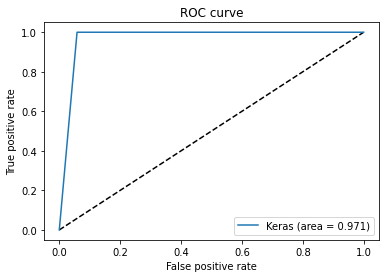

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(roc_auc))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('Custom_binary_Pneumonia.png',dpi=300)
plt.show()

In [ ]:
!cp -r "/content/Custom_binary_Pneumonia.png" "/content/drive/MyDrive/Model"

## Applying VGG Binary model to Covid and Pneumonia

In [ ]:
checkpoint =ModelCheckpoint(filepath="VGG_CNN__binary_model_Pneumonia.h5", 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True, 
                            save_weights_only=False, 
                            mode='auto',
                            save_freq='epoch')

callbacks = [checkpoint]

In [ ]:
bin = modelV2.fit_generator(tr,
                         steps_per_epoch = (tr.samples//32),
                         epochs = 5,
                         validation_data = va,
                         validation_steps = (va.samples/32),
                         callbacks = [checkpoint],
                         verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
63/63 [==============================] - 35s 494ms/step - loss: 0.4052 - accuracy: 0.7858 - val_loss: 0.0237 - val_accuracy: 0.9902

Epoch 00001: val_accuracy improved from -inf to 0.99018, saving model to VGG_CNN__binary_model_Pneumonia.h5
Epoch 2/5
63/63 [==============================] - 29s 464ms/step - loss: 0.0513 - accuracy: 0.9863 - val_loss: 0.0214 - val_accuracy: 0.9902

Epoch 00002: val_accuracy did not improve from 0.99018
Epoch 3/5
63/63 [==============================] - 29s 461ms/step - loss: 0.0420 - accuracy: 0.9836 - val_loss: 0.0300 - val_accuracy: 0.9902

Epoch 00003: val_accuracy did not improve from 0.99018
Epoch 4/5
63/63 [==============================] - 29s 459ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.1833 - val_accuracy: 0.9548

Epoch 00004: val_accuracy did not improve from 0.99018
Epoch 5/5
63/63 [==============================] - 29s 456ms/step - loss: 0.0381 - accuracy: 0.9874 - val_loss: 0.0556 - val_accuracy: 0.9882

Epoch 00005:

## Accuracy of VGG Model in Binary Classification of Covid and Viral Pneumonia

In [ ]:
bin_c = modelV2.evaluate(va,verbose=1)
print('Accuracy: %.2f' % (bin_c[1]*100))

16/16 [==============================] - 7s 439ms/step - loss: 0.0141 - accuracy: 0.9961
Accuracy: 99.61


In [ ]:
!cp -r "/content/VGG_CNN__binary_model_Pneumonia.h5" "/content/drive/MyDrive/Model1"

## ROC Curve of VGG Binary Model

In [ ]:
y_Vpred2= modelV2.predict_proba(va,verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


16/16 [==============================] - 7s 453ms/step


In [ ]:
Vpred2= np.round(y_Vpred2)
y_V2= va.classes
# y=np.expand_dims(y,axis=1)
print(Vpred2.shape)

(509, 1)


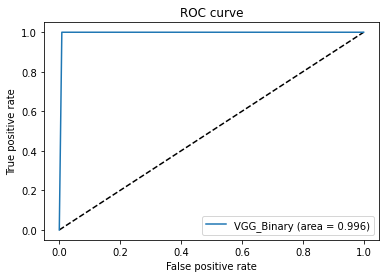

In [ ]:
fprV, tprV, thresholdV = metrics.roc_curve(y_V2, Vpred2)
roc_auc2 = metrics.auc(fprV, tprV)

# method I: plt

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprV, tprV, label='VGG_Binary (area = {:.3f})'.format(roc_auc2))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('VGG_binary_Pneumonia',dpi=300)
plt.show()

In [ ]:
!cp -r "/content/VGG_binary_Pneumonia.png" "/content/drive/MyDrive/Model"

## Comparison of VGG and Custom Binary Model in classification of Covid and Viral Penumonia

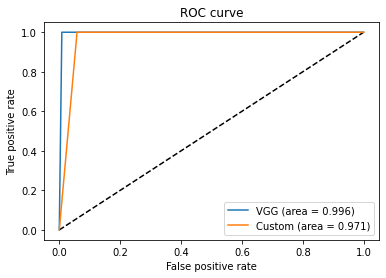

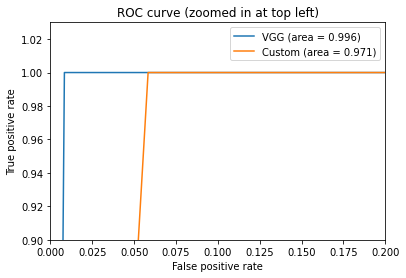

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprV, tprV, label='VGG (area = {:.3f})'.format(roc_auc2))
plt.plot(fpr, tpr, label='Custom (area = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('VGG_Custom_both_Pneumonia',dpi=300)
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.9, 1.03)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprV, tprV, label='VGG (area = {:.3f})'.format(roc_auc2))
plt.plot(fpr, tpr, label='Custom (area = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.savefig('VGG_Custom_zoomed_Pneumonia',dpi=300)
plt.show()

In [ ]:
!cp -r "/content/VGG_Custom_zoomed_Pneumonia.png" "/content/drive/MyDrive/Model1"

# **So Clearly VGG Model is better in all 3 classifications. Therefore, we can say using Transfer Learning is more useful and impactful than creating Custom model**